INTRODUCTION

This dataset contains 2,325 records of mushrooms with 9 features, including cap diameter, shape, gill attachment, stem height, and color. The dataset is likely used for classification, where the "class" column indicates whether a mushroom is edible or poisonous.

IMPORT LABARIES AND LOAD DATASET

In [1]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
#import dataset
df=pd.read_csv(r'C:\Data Science\data_set\mushroom1.csv')
print(df)




      cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0             1372          2                2          10     3.807467   
1             1461          2                2          10     3.807467   
2             1371          2                2          10     3.612496   
3             1261          6                2          10     3.787572   
4             1305          6                2          10     3.711971   
...            ...        ...              ...         ...          ...   
2320           623          1                2          10     2.840572   
2321           667          6                2          10     2.581938   
2322           466          6                2          10     2.442674   
2323           638          1                2          10     2.721203   
2324           383          1                2          10     1.877657   

      stem-width  stem-color    season  class  
0           1545          11  1.804273      1  
1  

DATA CLEANING

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     2325 non-null   int64  
 1   cap-shape        2325 non-null   int64  
 2   gill-attachment  2325 non-null   int64  
 3   gill-color       2325 non-null   int64  
 4   stem-height      2325 non-null   float64
 5   stem-width       2325 non-null   int64  
 6   stem-color       2325 non-null   int64  
 7   season           2325 non-null   float64
 8   class            2325 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 163.6 KB


In [3]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [4]:
df.duplicated().sum()

0

DATA VISUALIZATION BY FINDING CORRELATION BETWEEN THE DATAS 

                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000  -0.008730        -0.202299         NaN   
cap-shape           -0.008730   1.000000        -0.054161         NaN   
gill-attachment     -0.202299  -0.054161         1.000000         NaN   
gill-color                NaN        NaN              NaN         NaN   
stem-height          0.340924  -0.544723        -0.219967         NaN   
stem-width           0.543348   0.142568        -0.517158         NaN   
stem-color           0.143798   0.123144        -0.081921         NaN   
class                0.276258  -0.294510         0.151838         NaN   

                 stem-height  stem-width  stem-color     class  
cap-diameter        0.340924    0.543348    0.143798  0.276258  
cap-shape          -0.544723    0.142568    0.123144 -0.294510  
gill-attachment    -0.219967   -0.517158   -0.081921  0.151838  
gill-color               NaN         NaN         NaN       NaN  
stem-height      

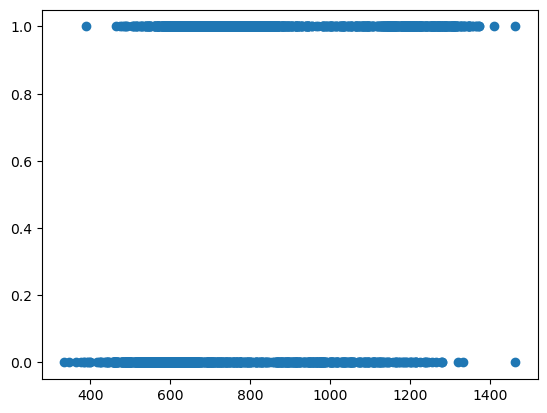

In [5]:

cor=df[['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','class']].corr()
print(cor)
plt.scatter(df['cap-diameter'],df['class'])
plt.show()

EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES 

In [6]:
x=df.iloc[:,0:6]
x=pd.DataFrame(x)
y=df.iloc[:,8]
y=pd.DataFrame(y)
print(y)

      class
0         1
1         1
2         1
3         1
4         1
...     ...
2320      0
2321      0
2322      0
2323      0
2324      0

[2325 rows x 1 columns]


SPLITING  DATA INTO TRAIN AND TEST DATA

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=80)

FEATURE SCALING

In [8]:
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)

MODEL BUILDING AND EVALUATE PREDICTIONS 

MODEL OF KNN

In [9]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
y_predict=classifier.predict(x_test)
print(y_test)
print(y_predict)

      class
803       0
596       1
2223      0
1260      1
1568      0
...     ...
782       0
1530      0
844       0
1464      0
1669      0

[465 rows x 1 columns]
[0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1
 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 0 

In [11]:
print("mse value of knn regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in knn regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of knn regression: 0.04516129032258064
accuracy in knn regression: 95.48387096774194


MODEL OF LOGISTIC REGRESSION 

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',random_state=67)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=67)

In [13]:
y_predict=model.predict(x_test)
print(y_test)
print(y_predict)

      class
803       0
596       1
2223      0
1260      1
1568      0
...     ...
782       0
1530      0
844       0
1464      0
1669      0

[465 rows x 1 columns]
[0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 0 

In [14]:
print("mse value of logistic regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in logistic regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of logistic regression: 0.2924731182795699
accuracy in logistic regression: 70.75268817204301


MODEL OF SVM

In [15]:
from sklearn.svm import SVC
model1=SVC(kernel='linear',random_state=42)
model1.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [16]:
y_predict=model1.predict(x_test)
print(y_test)
print(y_predict)

      class
803       0
596       1
2223      0
1260      1
1568      0
...     ...
782       0
1530      0
844       0
1464      0
1669      0

[465 rows x 1 columns]
[0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 0 

In [17]:
print("mse value of Svm regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in Svm regression:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of Svm regression: 0.3053763440860215
accuracy in Svm regression: 69.46236559139784


MODEL OF RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=67)
model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=67)

In [19]:
y_predict=model2.predict(x_test)
print(y_test)
print(y_predict)

      class
803       0
596       1
2223      0
1260      1
1568      0
...     ...
782       0
1530      0
844       0
1464      0
1669      0

[465 rows x 1 columns]
[0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 

In [20]:
print("mse value of random forest:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in random forest:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of random forest: 0.05161290322580645
accuracy in random forest: 94.83870967741936


MODEL OF DECISION TREE

In [21]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',random_state=80)
model3.fit(x_train,y_train)




DecisionTreeClassifier(criterion='entropy', random_state=80)

In [22]:
y_predict=model3.predict(x_test)
print(y_test)
print(y_predict)

      class
803       0
596       1
2223      0
1260      1
1568      0
...     ...
782       0
1530      0
844       0
1464      0
1669      0

[465 rows x 1 columns]
[1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 

In [23]:
print("mse value of decision tree:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in decision tree:",metrics.accuracy_score(y_predict,y_test)*100)

mse value of decision tree: 0.06666666666666667
accuracy in decision tree: 93.33333333333333


SUMMARY 

This project aimed to predict whether a mushroom is edible or poisonous classification by using given features .After processing ,we tested multiple model, inclding  Logistic regression ,Decision tree,Random forest,SVM,KNN.The KNN model achieved the highest accuarcy of 95.48%,making it the best performing model.